# Generación de imágenes a partir de un texto

**Instalación con las librerías necesarias**

In [ ]:
!pip install transformers
!pip install git+https://github.com/huggingface/diffusers.git

**Importación de librerías**

In [4]:
import os
import torch
import torch.nn.functional as F
from matplotlib import pyplot as plt
from diffusers import StableDiffusionPipeline

### Función para mostrar imágenes generadas


In [5]:
def plot_images(images):
  """
  Muestra varias imágenes en una misma fila.
  Parámetros:
  images (lista de imagenes)

  """
  plt.figure()
  f, axarr = plt.subplots(1, len(images), figsize=(20,10))
  for ax, img in zip(axarr.flatten(), images):
      ax.imshow(img)
      ax.axis('off')
  plt.show()

# Carga del modelo elegido

## Aca utilizamos el modelo Stable Difussion , open-source y disponible Hugging Face

In [6]:
# Carga de modelo elegido usando StableDiffusionPipeline de diffusers, con pesos pre-entrenados
pipe = StableDiffusionPipeline.from_pretrained("stabilityai/stable-diffusion-2-base", torch_dtype=torch.float16)
# Configuración para utilizar GPU
pipe = pipe.to("cuda")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/537 [00:00<?, ?B/s]

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

text_encoder/config.json:   0%|          | 0.00/738 [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.36G [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/929 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.46G [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/1.01k [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/716 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

## Prueba del modelo

- Utilizamos el prompt "A bicycle with a front basket and a cat inside it".
- Vamos a generar 4 imágenes por prompt.

In [7]:
# Primer prompt
prompt = "A bicycle with a front basket and a cat inside it"
images = pipe(prompt, num_images_per_prompt=4).images

  0%|          | 0/50 [00:00<?, ?it/s]

**Visualización de las imagenes generadas**

<Figure size 640x480 with 0 Axes>

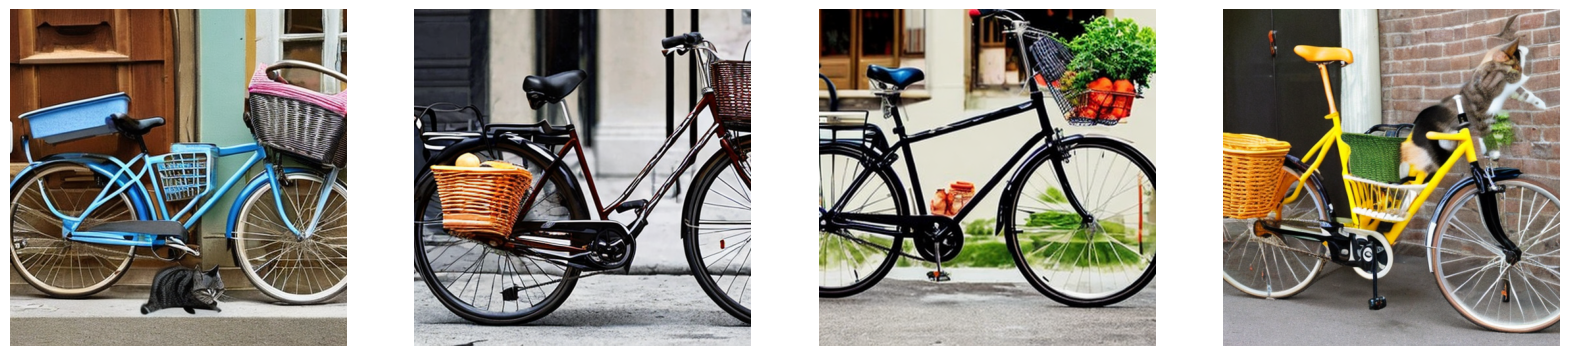

In [8]:
plot_images(images)

In [9]:
# Segundo prompt
prompt = "A fantasy landscape with dragons and castles"
images = pipe(prompt, num_images_per_prompt=4).images

  0%|          | 0/50 [00:00<?, ?it/s]

**Visualización de las imagenes generadas**

<Figure size 640x480 with 0 Axes>

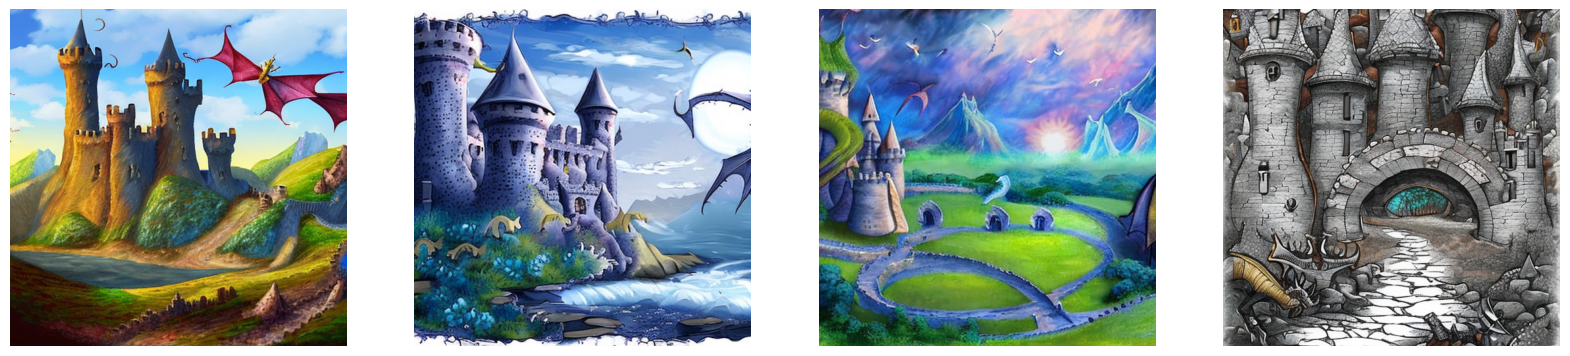

In [11]:
plot_images(images)

## Utilizando la siguiente versión de Stable Difussion v2

- Stable diffussion v2 es exactamente el mismo modelo que su versión base, pero con más epocas de entrenamiento

**Realizamos una limpieza de la memoria**

In [15]:
import gc
# Check if 'pipe' and 'images' are defined before deleting them
if 'pipe' in locals():
    del pipe
if 'images' in locals():
    del images

gc.collect()
torch.cuda.empty_cache()

**Carga del modelo Stable Difussion v2**

In [16]:
# Carga de modelo elegido usando StableDiffusionPipeline de diffusers, con pesos pre-entrenados
pipe = StableDiffusionPipeline.from_pretrained("stabilityai/stable-diffusion-2", torch_dtype=torch.float16)
pipe = pipe.to("cuda")

model_index.json:   0%|          | 0.00/537 [00:00<?, ?B/s]

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

model.safetensors:   0%|          | 0.00/1.36G [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/633 [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/345 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/824 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/909 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/611 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.46G [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

**Generacion de imagenes con los mismos prompt usando anteriormente**

  0%|          | 0/50 [00:00<?, ?it/s]

<Figure size 640x480 with 0 Axes>

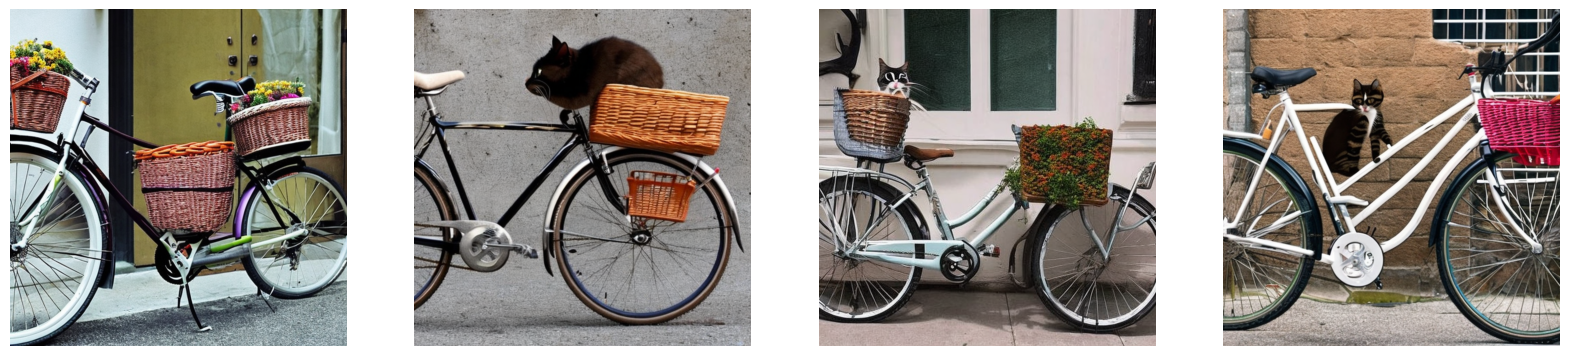

In [17]:
# Primer prompt
prompt = "A bicycle with a front basket and a cat inside it"
images = pipe(prompt, num_images_per_prompt=4).images
plot_images(images)

  0%|          | 0/50 [00:00<?, ?it/s]

<Figure size 640x480 with 0 Axes>

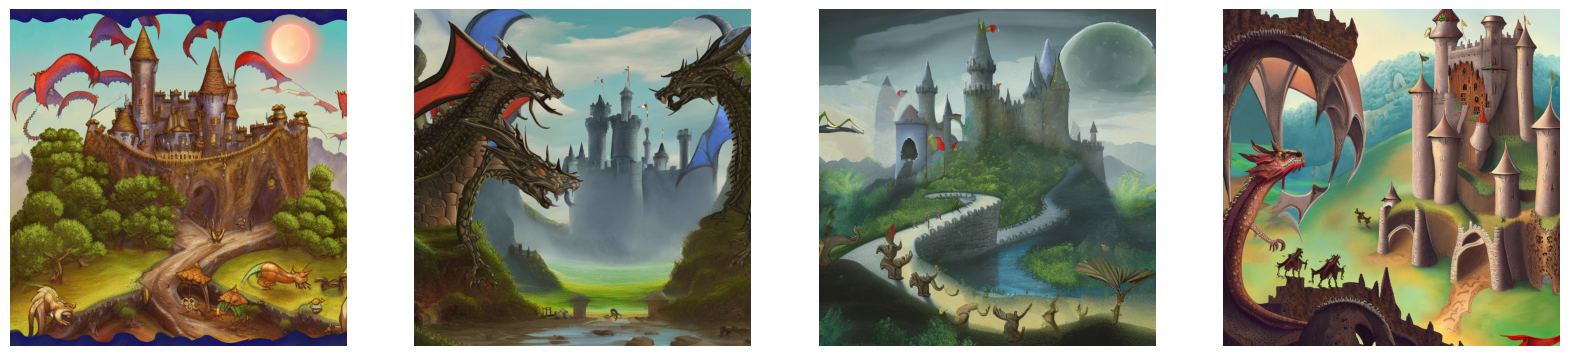

In [18]:
# Segundo prompt
prompt = "A fantasy landscape with dragons and castles"
images = pipe(prompt, num_images_per_prompt=4).images
plot_images(images)

# Conclusión

En este notebook se utilizó Stable Diffusion para generar imágenes a partir de texto, empleando dos versiones del modelo: stabilityai/stable-diffusion-2-base y stabilityai/stable-diffusion-2.

Ambos modelos generaron imágenes de alta calidad, con la versión 2 destacándose por su mayor coherencia y detalle en los resultados. Se mostró cómo estos modelos responden a descripciones textuales, destacando la eficiencia al usar GPU en Colab. Ambos modelos son potentes para tareas de text2img, siendo Stable Diffusion 2 la opción más precisa para prompts complejos.